#  Análisis Supervisado de Clasificación

## Dataset de gustos de peliculas

Dicho dataset a analizar contiene distintas clasificaciones de una persona respecto a varias peliculas que vio.
En el presente proyecto iremos desarrollando distintas maneras de analizarlo en base a diferentes tecnicas.
Daremos uso de bosques aleatorios, SVM, regresión logística y KNN.

## Análisis exploratorio de los datos

In [1]:
#Libreria que vamos a utilizar para el análisis
import pandas as pd#Para cargar y manipular la base de datos
import matplotlib.pyplot as plt#Graficos
import numpy as np#Para alguna operación que se necesite
import random#Establecer una semilla aleatoria para que el ejercicio se compute exactamente igual

In [2]:
start = pd.read_excel(r"C:\Users\Nahuel\Desktop\DataSets a Estudiar\My Personal Movie DataSet\data.xlsx")#Cargamos la tabla
random.seed(21)#Semilla

In [3]:
start.shape#Observamos las dimensiones, esta bien saberlas desde un principio, ya que luego procederemos a filtrar los NaN's

(330, 12)

In [4]:
start.head()#Los datos resultan estar bien cargados

,RNK,TITLE,RATE,DIRECTOR,YEAR,GENRE 1,GENRE 2,ACT 1,ACT 2,ACT 3,ACT 4,ACT 5
0,1,The Prestige,10.0,Christopher Nolan,2006,Mystery,Sci-Fi,Christian Bale,Hugh Jackman,Michael Caine,Scarlett Johansson,Andy Serkis
1,2,Interstellar,10.0,Christopher Nolan,2014,Sci-Fi,Adventure,Matthew McConaughey,Anne Hathaway,Michael Caine,Jessica Chastain,Timothée Chalamet
2,3,Inception,10.0,Christopher Nolan,2010,Sci-Fi,Adventure,Leonardo DiCaprio,Cillian Murphy,Michael Caine,Marion Cotillard,Joseph Gordon-Levitt
3,4,Cars,9.0,John Lasseter,2006,Animation,Sport,NaN,NaN,NaN,NaN,NaN
4,5,Predestination,9.0,Michal Spierig,2014,Sci-Fi,Drama,Ethan Hawke,Noah Taylor,Sarah Snook,Madeleine West,Christopher Kirby


In [5]:
df = start.drop(["RNK"], axis=1)#Elegimos dropear RNK ya que es una variable sin valor en este caso, 
#RNK estaria cumpliendo el mismo proposito del indice, ya que estan ordenados

In [6]:
df.head()

,TITLE,RATE,DIRECTOR,YEAR,GENRE 1,GENRE 2,ACT 1,ACT 2,ACT 3,ACT 4,ACT 5
0,The Prestige,10.0,Christopher Nolan,2006,Mystery,Sci-Fi,Christian Bale,Hugh Jackman,Michael Caine,Scarlett Johansson,Andy Serkis
1,Interstellar,10.0,Christopher Nolan,2014,Sci-Fi,Adventure,Matthew McConaughey,Anne Hathaway,Michael Caine,Jessica Chastain,Timothée Chalamet
2,Inception,10.0,Christopher Nolan,2010,Sci-Fi,Adventure,Leonardo DiCaprio,Cillian Murphy,Michael Caine,Marion Cotillard,Joseph Gordon-Levitt
3,Cars,9.0,John Lasseter,2006,Animation,Sport,NaN,NaN,NaN,NaN,NaN
4,Predestination,9.0,Michal Spierig,2014,Sci-Fi,Drama,Ethan Hawke,Noah Taylor,Sarah Snook,Madeleine West,Christopher Kirby


In [7]:
df.dtypes#Realmente todos deberian de ser tratados como objetos, ya que el año en este dataframe cumple una funcion de variable
#Categorica y no de continua, es una variable que le da un adjetivo al objeto, 
#no proporciona una evolucion en el tiempo.


TITLE        object
RATE        float64
DIRECTOR     object
YEAR          int64
GENRE 1      object
GENRE 2      object
ACT 1        object
ACT 2        object
ACT 3        object
ACT 4        object
ACT 5        object
dtype: object

In [8]:
df = df.dropna()#Limpieza de NaN's antes de realizar un grafico de correlación, 
#este paso se realiza previamente a la creacion de dummies, de no hacerlo podriamos tener filas
#repletas de 0 y no es lo ideal, podria sesgar el análisis.
df.shape

(203, 11)

In [9]:
def CreateDummies(df, ColumnDividir):#Funcion para creacion de dummies
    df2 = pd.get_dummies(df[ColumnDividir], prefix = ColumnDividir)
    df = df.drop([ColumnDividir], axis = 1)
    df = pd.concat([df, df2], axis = 1)
    return df

In [10]:
df_a = df[["RATE", "GENRE 1"]]#Selecciono solo Rate y GENRE 1, ya que queremos saber si existe preferencias en cuanto a generos 
#Por parte de nuestro cliente, público o socio.
df_a = CreateDummies(df_a, "GENRE 1" )

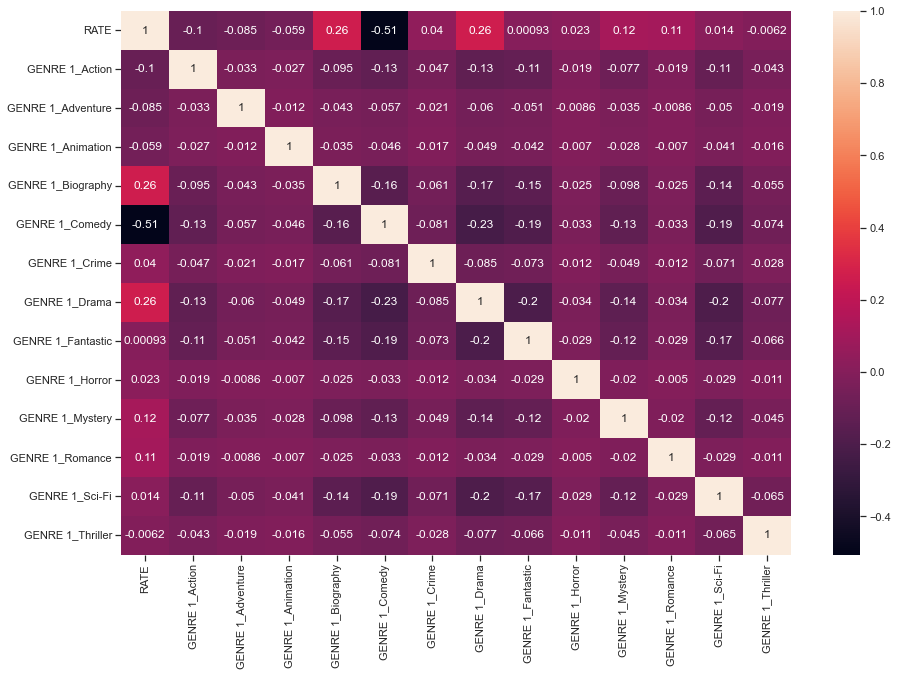

In [11]:
import seaborn as sns#Libreria para creacion de graficos de calor
sns.set(style = "ticks", color_codes=True)
plt.figure(figsize=(15,10))
sns.heatmap(df_a.corr(), annot=True)
plt.show()
#La fila/columna a observar debe ser la primera de todas en este caso, podemos notar que el consumidor tiene una preferencia 
#notable en 3 generos, como son la comedia, drama y biografias.
#Esto es algo importante a recordar para mas adelante cuando trabajemos con seleccion de variables con SKLearn.

In [12]:
df = df.astype(object)#Convertimos todos a objetos, aunque observaremos mas adelante como RATE lo volvemos a pasar a número.
df.dtypes

TITLE       object
RATE        object
DIRECTOR    object
YEAR        object
GENRE 1     object
GENRE 2     object
ACT 1       object
ACT 2       object
ACT 3       object
ACT 4       object
ACT 5       object
dtype: object

Text(0.5, 1.0, 'Cantidad de Películas por Rating')

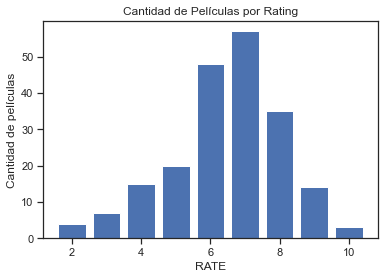

In [13]:
plt.bar(sorted(df["RATE"].unique()), np.array(df.groupby(["RATE"])["RATE"].count()))
plt.xlabel("RATE")
plt.ylabel("Cantidad de películas")
plt.title("Cantidad de Películas por Rating")
#Podemos observar que lo más frecuente es que vote entre 6 y 8.
#Hay algo importante a fijarse, y es que la cantidad de votos con 2,3 y 10 son extremadamente bajos.
#Esto podria darnos problemas con algoritmos como RandomForest, ya que ellos necesitan almenos 5 muestras para crear un nodo 
#de decisión. Ya podemos ir pensando que randomforest tal vez no sea la mejor manera de tratar este dataframe.

Text(0.5, 1.0, 'Frecuencia de Año de Estreno de Películas')

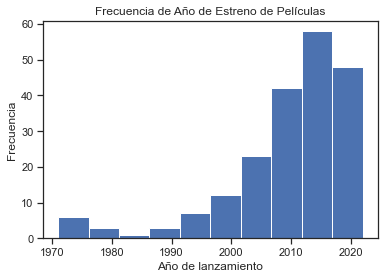

In [14]:
plt.hist(df["YEAR"])
plt.xlabel("Año de lanzamiento")
plt.ylabel("Frecuencia")
plt.title("Frecuencia de Año de Estreno de Películas")
#Notamos un sesgo importante, una gran parte de peliculas son de los ultimos 10 años.

In [15]:
sorted(df["GENRE 1"].unique())#Generos que existen en GENRE 1

['Action',
 'Adventure',
 'Animation',
 'Biography',
 'Comedy',
 'Crime',
 'Drama',
 'Fantastic',
 'Horror',
 'Mystery',
 'Romance',
 'Sci-Fi',
 'Thriller']

In [16]:
genre_count = df.groupby(["GENRE 1"])["GENRE 1"].count()
genre_count #Podemos ver que la mayoria de peliculas son de los generos de comedia y drama, lo cual puede estar sesgando a la correlacion que 
#evaluamos antes, o incluso sesgar la eleccion de variables.

GENRE 1
Action       14
Adventure     3
Animation     2
Biography    22
Comedy       36
Crime         6
Drama        39
Fantastic    30
Horror        1
Mystery      15
Romance       1
Sci-Fi       29
Thriller      5
Name: GENRE 1, dtype: int64

Text(0.5, 1.0, 'Cantidad de Películas por Género')

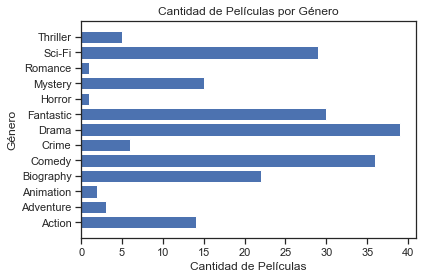

In [17]:
plt.barh(sorted(df["GENRE 1"].unique()), np.array(genre_count))
plt.xlabel("Cantidad de Películas")
plt.ylabel("Género")
plt.title("Cantidad de Películas por Género")

In [18]:
df.columns.values.tolist()#Todas las columnas del dataframe

['TITLE',
 'RATE',
 'DIRECTOR',
 'YEAR',
 'GENRE 1',
 'GENRE 2',
 'ACT 1',
 'ACT 2',
 'ACT 3',
 'ACT 4',
 'ACT 5']

## Variable Target y Variables Predictoras

En esta sección nos centraremos en ya ir moldeando tantos las variables X(nuestras variables que nos ayudan a predecir) como las 
variables Y(las que nos interesan predecir), daremos uso de la función de dummies que creamos antes y algunas técnicas para separar dichas variables de manera simple y efectiva.

In [19]:
df = CreateDummies(df, "GENRE 1" )
df = CreateDummies(df, "GENRE 2" )
df = CreateDummies(df, "YEAR" )
df = CreateDummies(df, "DIRECTOR" )
df = CreateDummies(df, "ACT 1" )
df = CreateDummies(df, "ACT 2" )
df = CreateDummies(df, "ACT 3" )
df = CreateDummies(df, "ACT 4" )
df = CreateDummies(df, "ACT 5" )

In [20]:
df.head()

,TITLE,RATE,GENRE 1_Action,GENRE 1_Adventure,GENRE 1_Animation,GENRE 1_Biography,GENRE 1_Comedy,GENRE 1_Crime,GENRE 1_Drama,GENRE 1_Fantastic,...,ACT 5_Yahya Abdul-Mateen II,ACT 5_Yuri Kolokolnikov,ACT 5_Zafer Algöz,ACT 5_Zeynep Karacan,ACT 5_Zihni Göktay,ACT 5_Zuleyka Silver,ACT 5_Çağlar Çorumlu,ACT 5_Özge Borak,ACT 5_İbrahim Büyükak,ACT 5_Şinasi Yurtsever
0,The Prestige,10.0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,Interstellar,10.0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,Inception,10.0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,Predestination,9.0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
5,Rush,9.0,0,0,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [21]:
df = df.drop(["TITLE"], axis = 1)#El titulo no nos será util a la hora de predecir.

In [22]:
df.head()#Tenemos un dataset de 996 columnas, lo cual tiene sentido despues de crear tantas dummies

,RATE,GENRE 1_Action,GENRE 1_Adventure,GENRE 1_Animation,GENRE 1_Biography,GENRE 1_Comedy,GENRE 1_Crime,GENRE 1_Drama,GENRE 1_Fantastic,GENRE 1_Horror,...,ACT 5_Yahya Abdul-Mateen II,ACT 5_Yuri Kolokolnikov,ACT 5_Zafer Algöz,ACT 5_Zeynep Karacan,ACT 5_Zihni Göktay,ACT 5_Zuleyka Silver,ACT 5_Çağlar Çorumlu,ACT 5_Özge Borak,ACT 5_İbrahim Büyükak,ACT 5_Şinasi Yurtsever
0,10.0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,10.0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,10.0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,9.0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
5,9.0,0,0,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [23]:
target = ["RATE"]#Nuestra variable a predecir

In [24]:
colnames = df.columns.values.tolist()#conseguimos una lista de todas las variables

In [25]:
colnames[:5]

['RATE',
 'GENRE 1_Action',
 'GENRE 1_Adventure',
 'GENRE 1_Animation',
 'GENRE 1_Biography']

In [26]:
predictors = [v for v in colnames if v not in target]#Conseguimos una lista con todas las variables exceptuando la Y

In [27]:
predictors[:5]#Nuestras variables predictoras

['GENRE 1_Action',
 'GENRE 1_Adventure',
 'GENRE 1_Animation',
 'GENRE 1_Biography',
 'GENRE 1_Comedy']

In [28]:
Y = df[target].astype(int)#Pasamos a Y como entero

In [29]:
X = df[predictors]

## RandomForest / Bosque Aleatorio
Empezaremos dando uso de un bosque aleatorio para clasificar, el mismo es muy util cuando nos enfrentamos a problemas de multiclasificación y además poseemos un gran número de razgos/columnas.
Algo importante a recordar es la pequeña cantidad de muestras del valor 2,3 y 10. Nuestro modelo de todas formas podría resultar no tan bueno debido a estas pequeñas cantidades.

In [30]:
from sklearn.model_selection import train_test_split#train and test

In [31]:
from sklearn.utils import shuffle#Para randomizar un poco la muestra y no quede tan ordenada

In [32]:
from sklearn.ensemble import RandomForestClassifier #Importamos el modelo a utilizar

In [33]:
X_sh, Y_sh = shuffle(X,Y, random_state=21)#Mezclamos

In [34]:
X_train1, X_test1, Y_train1, Y_test1 = train_test_split(X_sh,Y_sh, test_size= 0.20, random_state=21)#Esta es una forma de hacer
#la creacion de test and train, usaremos un 80% para entrenar y un 20% para testear.
#Más adelante usaremos otra técnica para evaluar, conocida como Kfold cross validation.

In [35]:
X_test1.shape, X_train1.shape#Las dimensiones de los conjuntos de entrenamiento y testeo

((41, 995), (162, 995))

In [36]:
forest = RandomForestClassifier(n_jobs = -1, n_estimators = 2000,  oob_score = True, random_state = 21)#Creacion de modelo
#con 2000 arboles

In [37]:
forest.fit(X_train1, Y_train1)#Entrenamos el modelo, como es un bosque aleatorio, no es necesario elegir variables, el mismo modelo las pondera
#Y elige las mas optimas.

C:\Users\Nahuel\anaconda3\envs\Tranajo\lib\site-packages\ipykernel_launcher.py:1: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  """Entry point for launching an IPython kernel.
C:\Users\Nahuel\anaconda3\envs\Tranajo\lib\site-packages\sklearn\base.py:446: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  "X does not have valid feature names, but"


RandomForestClassifier(n_estimators=2000, n_jobs=-1, oob_score=True,
                       random_state=21)

In [38]:
forest.score(X_test1, Y_test1)#Tenemos un score aprox de 0.31, lo cual indica que es bastante malo, pero por medio de técnicas lo mejoraremos.

0.3170731707317073

## SVC 
Continuando tenemos SVM, específicamente SVClassifier, al igual que el random forest es muy util en situaciones con multiclasificación, con  una gran cantidad de columnas y especialmente en dataset medianos debido a su gran coste computacional.
En esta seccion daremos uso de un poco mas de machine learning para decidir cual es el C y gamma óptimo, y que estilo de kernel.

In [39]:
from sklearn.svm import SVC#Importamos el modelo

In [40]:
from sklearn.metrics import classification_report#Para evaluar el modelo
from sklearn.model_selection import GridSearchCV #GridSearchCV para mezclar aun un poco mas, y sacar la C, kernel y gamma optima

In [41]:
parameters = [{
    "kernel":["rbf"],
    "gamma":[1e-4,1e-2,0.01,0.2,0.05],
    "C" : [1,10,100,1000,2000]    
},           
 {
     "kernel": ["linear"],
     "C":[1,10,100,1000,2000]
     
 }]#Les damos los posibles kernel a elegir(en este caso use 2 para demostrar y no saturar mi computadora,
#se podria implementar con los demás que existe),y también aun más posibles C y Gamma. 

In [42]:
clf = GridSearchCV(SVC(decision_function_shape="ovr"),param_grid=parameters, cv=4).fit(X_train1, Y_train1.values.ravel())
#Creamos y entrenamos

C:\Users\Nahuel\anaconda3\envs\Tranajo\lib\site-packages\sklearn\model_selection\_split.py:680: UserWarning: The least populated class in y has only 3 members, which is less than n_splits=4.
  UserWarning,


In [43]:
clf.best_params_#Tenemos que el mejor modelo seria un rbf, con C=1, y gamma = 0.2

{'C': 1, 'gamma': 0.2, 'kernel': 'rbf'}

In [44]:
classifier = clf.best_estimator_#Creamos el modelo con los mejores parametros

In [45]:
yfit1 = classifier.predict(X_test1)#Le damos el conjunto de test para evaluar

In [46]:
print(classification_report(Y_test1, yfit1))#Aca tenemos la evaluacion, podemos notar varias cosas, entre ellas que la precision
#es de 0.29, y lo segundo es que varios resultados salen 0 de precision y 0 de recall, esto es debido a que habia muy pocas 
#Observaciones de esos resultados, nos ocurrio lo mismo que en randomforest. Como se podría solucionar?

              precision    recall  f1-score   support

           3       0.00      0.00      0.00         2
           5       0.00      0.00      0.00         6
           6       0.33      0.09      0.14        11
           7       0.29      0.92      0.44        12
           8       0.00      0.00      0.00         7
           9       0.00      0.00      0.00         3

    accuracy                           0.29        41
   macro avg       0.10      0.17      0.10        41
weighted avg       0.17      0.29      0.17        41



C:\Users\Nahuel\anaconda3\envs\Tranajo\lib\site-packages\sklearn\metrics\_classification.py:1308: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\Nahuel\anaconda3\envs\Tranajo\lib\site-packages\sklearn\metrics\_classification.py:1308: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\Nahuel\anaconda3\envs\Tranajo\lib\site-packages\sklearn\metrics\_classification.py:1308: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


## Reclasificando Y
Una forma de solucionarlo seria hacer una reclasificacion de Y, tal vez lo más óptimo no es intentar clasificar el número exacto valoracion de una película, sino si posiblemente le va a gustar o no.
Para esto lo que hacemos es separar Y en dos tramos:
* le gusta, una nota de entre 7 (incluido) y 10
* No le gusta, una nota menor que 7

Con esto en principio solucionariamos el problema de cantidad de muestras de las variables a predecir.
Tambien pasariamos de un problema de multiclasificación a un problema de unicamente 2 clasificaciones (con esto podríamos implementar también regresión logística).

In [47]:
evenType = list(Y.values)
evenType[:5]#Creamos una lista con todos los valores dentro de Y, es decir "RATE"

[array([10]), array([10]), array([10]), array([9]), array([9])]

In [48]:
#Creamos una función, que hará que los valores del 1 al 6, tomen el valor de "0" y los mayores de 6 hasta 10, sean "1"
x = None
def event(n):
    if n in range(1,7):
        x = 0
    if n in range(7,11):
        x = 1
    else:
        x = x
    return x

In [49]:
state = list(map(lambda n: event(n), evenType))#Aplicamos la funcion a cada valor dentro de evenType

In [50]:
state[:5]#Observamos el resultado, si es 1, seguramente esa pelicula le vaya a gustar ya que tendra un puntaje de 7 o más
#si es 0 posiblemente no le vaya a gustar, ya que tendrá un puntaje inferior a 7.

[1, 1, 1, 1, 1]

In [51]:
X_train, X_test, Y_train, Y_test = train_test_split(X,state, test_size= 0.20, random_state=21)#creamos nuevos train and test 

In [52]:
forest2 = RandomForestClassifier(n_jobs = -1, n_estimators = 2000, oob_score=True, random_state=21)#Creamos nuevamente el modelo

In [53]:
forest2.fit(X_train, Y_train)#Y lo entrenamos con los nuevos train and test.

C:\Users\Nahuel\anaconda3\envs\Tranajo\lib\site-packages\sklearn\base.py:446: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  "X does not have valid feature names, but"


RandomForestClassifier(n_estimators=2000, n_jobs=-1, oob_score=True,
                       random_state=21)

In [54]:
forest2.score(X_test, Y_test)#Observamos que la efectividad del modelo, subió increiblemente (COMPARANDO CON EL FOREST ANTERIOR)

0.7317073170731707

In [55]:
clf2 = GridSearchCV(SVC(decision_function_shape="ovr"),param_grid=parameters, cv=4).fit(X_train, Y_train)

In [56]:
clf2.best_params_#Vemos que los parametros de C y gamma cambiaron

{'C': 1000, 'gamma': 0.0001, 'kernel': 'rbf'}

In [57]:
classifier2 =clf2.best_estimator_

In [58]:
yfit2 = classifier2.predict(X_test)

In [59]:
print(classification_report(Y_test, yfit2))#SVC también se incrementó

              precision    recall  f1-score   support

           0       0.78      0.67      0.72        21
           1       0.70      0.80      0.74        20

    accuracy                           0.73        41
   macro avg       0.74      0.73      0.73        41
weighted avg       0.74      0.73      0.73        41



## Implementación de Regresión Logística

In [60]:
#Como mencionamos antes ahora usaremos regresión logistica, y tambien RFE para seleccionar las variables más optimas.
from sklearn.linear_model import LogisticRegression#Regresión Logistica
from sklearn.feature_selection import RFE#Selección de variables
from sklearn.model_selection import cross_val_score#KFold Cross validation, mencionamos previamente que lo utilizariamos
from sklearn.model_selection import LeaveOneOut#Demostrar la máxima capacidad de kfoldCrossValidation

In [61]:
lr = LogisticRegression()

In [62]:
rfe = RFE(lr, n_features_to_select=10)#Creacion de modelo y elección de variables
rfe = rfe.fit(X_train, Y_train)#Entrenamiento

In [63]:
rfe.ranking_[:7]#El ranking de todas las variables, las que salen con 1 son las que utilizaremos
#Cabe mencionar que este es la mejor combinacion posible con 10 variables.

array([70,  4, 14,  1,  1, 46,  1])

In [64]:
list(zip(X, rfe.ranking_))[:7]#Para observarlo de mejor manera

[('GENRE 1_Action', 70),
 ('GENRE 1_Adventure', 4),
 ('GENRE 1_Animation', 14),
 ('GENRE 1_Biography', 1),
 ('GENRE 1_Comedy', 1),
 ('GENRE 1_Crime', 46),
 ('GENRE 1_Drama', 1)]

In [65]:
df_features = X.columns.values[rfe.support_ == True]#Selecionamos las variables que posean el 1
X2 = X[df_features]#Nos quedamos solo con esas
X2.head()#Notar como mencionamos durante todo el análisis que los géneros comedia, biografía y drama parecia ser los que más influyen

,GENRE 1_Biography,GENRE 1_Comedy,GENRE 1_Drama,YEAR_2008,DIRECTOR_Christopher Nolan,DIRECTOR_Martin Scorsese,ACT 1_Christian Bale,ACT 1_Jake Gyllenhaal,ACT 1_Ryan Reynolds,ACT 5_Mark Ruffalo
0,0,0,0,0,1,0,1,0,0,0
1,0,0,0,0,1,0,0,0,0,0
2,0,0,0,0,1,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0
5,1,0,0,0,0,0,0,0,0,0


In [66]:
score = cross_val_score(lr, X2, state, scoring = "accuracy", cv = 10)#Creamos nuevamente el modelo pero esta vez usando las 
#variables elegidas y con cross validation.

In [67]:
score.mean()#Observamos el pseudo-r2

0.7040476190476191

In [68]:
score2 = cross_val_score(lr, X2, state, scoring = "accuracy", cv = LeaveOneOut())#Utilizamos cada fila para testear y entrenar

In [69]:
score2.mean()#Obtenemos un pseudo-r2 más preciso.

0.7586206896551724

### Mejorando Regresión Logística
Una manera óptima de mejorar el modelo sería haciendo un bucle que nos devuelva los valores de r2 según la cantidad de variables que se apliquen.

Con 2 variables, el r2 ajustado es 0.6724714285714286
Con 3 variables, el r2 ajustado es 0.6708255563531945
Con 4 variables, el r2 ajustado es 0.6181529581529582
Con 5 variables, el r2 ajustado es 0.6210974135847234
Con 6 variables, el r2 ajustado es 0.644684159378037
Con 7 variables, el r2 ajustado es 0.6428620268620269
Con 8 variables, el r2 ajustado es 0.646227295041728
Con 9 variables, el r2 ajustado es 0.6700616827041699
Con 10 variables, el r2 ajustado es 0.6886334325396826
Con 11 variables, el r2 ajustado es 0.6723984043879332
Con 12 variables, el r2 ajustado es 0.6759899749373433
Con 13 variables, el r2 ajustado es 0.6847089947089948
Con 14 variables, el r2 ajustado es 0.6991489361702128
Con 15 variables, el r2 ajustado es 0.7500076394194042
El r2 ajustado maximo es 0.7500076394194042, con una cantidad de (array([13], dtype=int64),) +2 variables


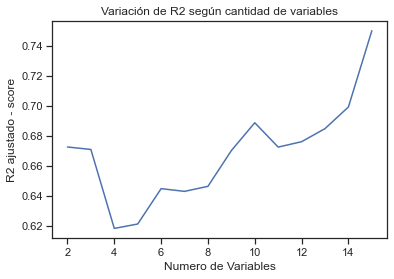

In [70]:
r2s = []
for i in range(2,16):
    lri = LogisticRegression()
    rfei = RFE(lri, n_features_to_select= i)
    rfei.fit(X_train,Y_train)
    df_featuresi = X.columns.values[rfei.support_ == True]
    Xi = X[df_featuresi]
    score_i = cross_val_score(lri, Xi, state, scoring = "accuracy", cv = 10)
    score_im = score_i.mean()
    n = len(Xi)
    Adj_r2 = 1-(1-score_im)*(n-1)/(n-i-1)
    r2s.append(Adj_r2)
    
    print("Con {0} variables, el r2 ajustado es {1}".format(i, Adj_r2))
    
plt.plot(range(2,16), r2s)
plt.xlabel("Numero de Variables")
plt.ylabel("R2 ajustado - score")
plt.title("Variación de R2 según cantidad de variables")
print("El r2 ajustado maximo es {0}, con una cantidad de {1} +2 variables".format(max(r2s), np.where(r2s == max(r2s)) ))

Podemos observar que sacariamos el maximo valor de pseudo-r2 ajustado con un total de 15 variables (en el rango establecido en el bucle).

Si quisieramos saber cuales son esas variables, bastaria con ejecutar el mismo codigo que antes pero aplicando 15 en lugar de 10.

In [71]:
#para ver las 15 variables:
rfef = RFE(lr, n_features_to_select=15)
rfef = rfef.fit(X_train, Y_train)
df_features = X.columns.values[rfef.support_ == True]
Xf = X[df_features]
Xf.columns.values.tolist() #Las variables seleccionadas.

['GENRE 1_Adventure',
 'GENRE 1_Biography',
 'GENRE 1_Comedy',
 'GENRE 1_Drama',
 'GENRE 1_Mystery',
 'YEAR_2008',
 'DIRECTOR_Christopher Nolan',
 'DIRECTOR_Martin Scorsese',
 'ACT 1_Chris Pratt',
 'ACT 1_Christian Bale',
 'ACT 1_Jake Gyllenhaal',
 'ACT 1_Ryan Reynolds',
 'ACT 2_Cillian Murphy',
 'ACT 5_Idris Elba',
 'ACT 5_Mark Ruffalo']

In [72]:
#Guardaremos los valores de los parametros para ir comparando 
#con las demás regresiones.
df_coeff15 = pd.DataFrame({
           "variable": Xf.columns.values})

In [73]:
X_train15, X_test15, Y_train15, Y_test15 = train_test_split(Xf, state, random_state=21, test_size=0.2)
lr15 = lr.fit(X_train15, Y_train15)

In [74]:
#Dataframe que contiene solo las variables que se utilizan en regresión logistica con RFE
df_coeff15["RFE15"] = lr15.coef_.reshape(-1,1)
df_coeff15.head()

,variable,RFE15
0,GENRE 1_Adventure,-0.866245
1,GENRE 1_Biography,1.600378
2,GENRE 1_Comedy,-1.300968
3,GENRE 1_Drama,1.224743
4,GENRE 1_Mystery,0.829417


### Lasso y Ridge

In [75]:
from sklearn.linear_model import RidgeClassifierCV#para computar Ridge usaremos este comando que es más cómodo
#Y para Lasso usaremos un parametro de LogisticRegression.

In [76]:
#Computamos Ridge
rdg = RidgeClassifierCV(alphas = np.logspace(-10, 2, 200), 
                        fit_intercept = True, cv=10)#Notar que este comando ya incluye cross validation.
rdg.fit(X_train,Y_train)

RidgeClassifierCV(alphas=array([1.00000000e-10, 1.14895100e-10, 1.32008840e-10, 1.51671689e-10,
       1.74263339e-10, 2.00220037e-10, 2.30043012e-10, 2.64308149e-10,
       3.03677112e-10, 3.48910121e-10, 4.00880633e-10, 4.60592204e-10,
       5.29197874e-10, 6.08022426e-10, 6.98587975e-10, 8.02643352e-10,
       9.22197882e-10, 1.05956018e-09, 1.21738273e-09, 1.39871310e-09,
       1.60705282e-09, 1.8...
       4.10265811e+00, 4.71375313e+00, 5.41587138e+00, 6.22257084e+00,
       7.14942899e+00, 8.21434358e+00, 9.43787828e+00, 1.08436597e+01,
       1.24588336e+01, 1.43145894e+01, 1.64467618e+01, 1.88965234e+01,
       2.17111795e+01, 2.49450814e+01, 2.86606762e+01, 3.29297126e+01,
       3.78346262e+01, 4.34701316e+01, 4.99450512e+01, 5.73844165e+01,
       6.59318827e+01, 7.57525026e+01, 8.70359136e+01, 1.00000000e+02]),
                  cv=10)

In [77]:
rdg.alpha_#El mejor alpha en Ridge para nuestro modelo

1e-10

In [78]:
rdg.best_score_#El modelo calculado con el mejor alpha

0.7099264705882353

In [79]:
#Armamos el dataframe para guardar los parametros
df_params = pd.DataFrame({
         "variable": X.columns.values
})

In [80]:
#Podemos apreciar los valores calculados por Ridge
df_params["rdg"] = rdg.coef_.reshape(-1,1)
df_params.head()

,variable,rdg
0,GENRE 1_Action,-0.168538
1,GENRE 1_Adventure,-0.319822
2,GENRE 1_Animation,-0.274899
3,GENRE 1_Biography,0.555524
4,GENRE 1_Comedy,-0.511656


In [81]:
#Computamos Lasso con un bucle para sacar el mejor alpha según pseudo-r2.

alpha = np.logspace(-10,2,200)
scores_ = []
for a in alpha:
    lss = LogisticRegression(penalty="l1", solver='liblinear', C = a)
    lss.fit(X_train, Y_train)
    sco = lss.score(X_test,Y_test)
    scores_.append([sco,a])#Rellenamos el array con el valor de r2 conjuntamente con su alpha
    dfscore = pd.DataFrame(scores_)#lo pasamos a dataframe para que sea mas facil trabajar
print(dfscore[dfscore[0]== max(dfscore[0])])#La primera fila serían nuestros valores, el r2 seguido por su alpha.

vals = np.array(dfscore[dfscore[0]== max(dfscore[0])])#pasamos a array la primera fila, es la que tiene mayor r2 con menor alpha
alp = vals[0][1]#Obtenemos unicamente el alpha

            0          1
184  0.829268  12.458834


In [82]:
lssf = LogisticRegression(penalty="l1", solver="liblinear", C = alp)#Computamos ahora si Lasso
lssf.fit(X_train,Y_train)
df_params["Lasso"] = lssf.coef_.reshape(-1,1)
df_params.head()#Podemos obsevar los coeficientes de Lasso comparados con Ridge

,variable,rdg,Lasso
0,GENRE 1_Action,-0.168538,-1.783968
1,GENRE 1_Adventure,-0.319822,-0.976222
2,GENRE 1_Animation,-0.274899,-3.174617
3,GENRE 1_Biography,0.555524,6.101887
4,GENRE 1_Comedy,-0.511656,-3.360002


In [83]:
#creamos un dataframe para ver todos los coeficientes de RDG, Lasso y RFE15.
df_params = pd.merge(left = df_params, right = df_coeff15, left_on = "variable", right_on = "variable", how = "left")
df_params.head()

,variable,rdg,Lasso,RFE15
0,GENRE 1_Action,-0.168538,-1.783968,NaN
1,GENRE 1_Adventure,-0.319822,-0.976222,-0.866245
2,GENRE 1_Animation,-0.274899,-3.174617,NaN
3,GENRE 1_Biography,0.555524,6.101887,1.600378
4,GENRE 1_Comedy,-0.511656,-3.360002,-1.300968


Podemos observar que las variables que Lasso no convirtió en 0 coinciden con las 15 variables elegidas con RFE.

## K Nearest Neighbors
Como último modelo usaremos KNN, un modelo que se basa en clasificar según como son los demás puntos más cercanos.

In [84]:
from sklearn.neighbors import KNeighborsClassifier

In [85]:
#Usaremos la versión de entrenamiento de X y state para agilizar el análisis
# X_test,X_train,Y_train, Y_test

In [86]:
Knn = KNeighborsClassifier().fit(X_train, Y_train)

In [87]:
accuracy = Knn.score(X_test, Y_test)

In [88]:
accuracy#Vemos que el modelo por si solo no es malo.

0.7317073170731707

## Conclusión
Para concluir la investigación asignaremos las etiquetas según cada modelo para cada linea/película del dataframe, además de computar las curvas ROC para cada modelo y decidir cual pareciera ser el mejor para estimar.

In [89]:
#Juntamos todo
df["Forest"] = forest2.predict(X)
df["SVC"] = clf2.predict(X)
df["RFE15"] = lr15.predict(Xf)
df["Ridge"] = rdg.predict(X)
df["Lasso"] = lssf.predict(X)
df["KNN"] = Knn.predict(X)
df["Title"] = start["TITLE"]
df = df[["Forest","SVC","RFE15","Ridge","Lasso","KNN","Title"]]
df_final = pd.merge(left = start.dropna(), right = df, left_on = "TITLE", right_on = "Title", how = "left")
df_final = df_final.drop(["Title"], axis = 1)#Dropeamos para que no quede dos veces el mismo título
df_final["True"] = state#El Y verdadero, según lo aclaramos cuando realizamos la función lambda

In [90]:
df_final.head()#podemos ver la clasificación según modelo

,RNK,TITLE,RATE,DIRECTOR,YEAR,GENRE 1,GENRE 2,ACT 1,ACT 2,ACT 3,ACT 4,ACT 5,Forest,SVC,RFE15,Ridge,Lasso,KNN,True
0,1,The Prestige,10.0,Christopher Nolan,2006,Mystery,Sci-Fi,Christian Bale,Hugh Jackman,Michael Caine,Scarlett Johansson,Andy Serkis,1,1,1,1,1,1,1
1,2,Interstellar,10.0,Christopher Nolan,2014,Sci-Fi,Adventure,Matthew McConaughey,Anne Hathaway,Michael Caine,Jessica Chastain,Timothée Chalamet,1,1,1,1,1,1,1
2,3,Inception,10.0,Christopher Nolan,2010,Sci-Fi,Adventure,Leonardo DiCaprio,Cillian Murphy,Michael Caine,Marion Cotillard,Joseph Gordon-Levitt,1,1,1,1,1,1,1
3,5,Predestination,9.0,Michal Spierig,2014,Sci-Fi,Drama,Ethan Hawke,Noah Taylor,Sarah Snook,Madeleine West,Christopher Kirby,1,1,0,1,1,1,1
4,6,Rush,9.0,Ron Howard,2013,Biography,Sport,Chris Hemsworth,Daniel Brühl,Olivia Wilde,Alexandra Maria Lara,Natalie Dormer,1,1,1,1,1,1,1


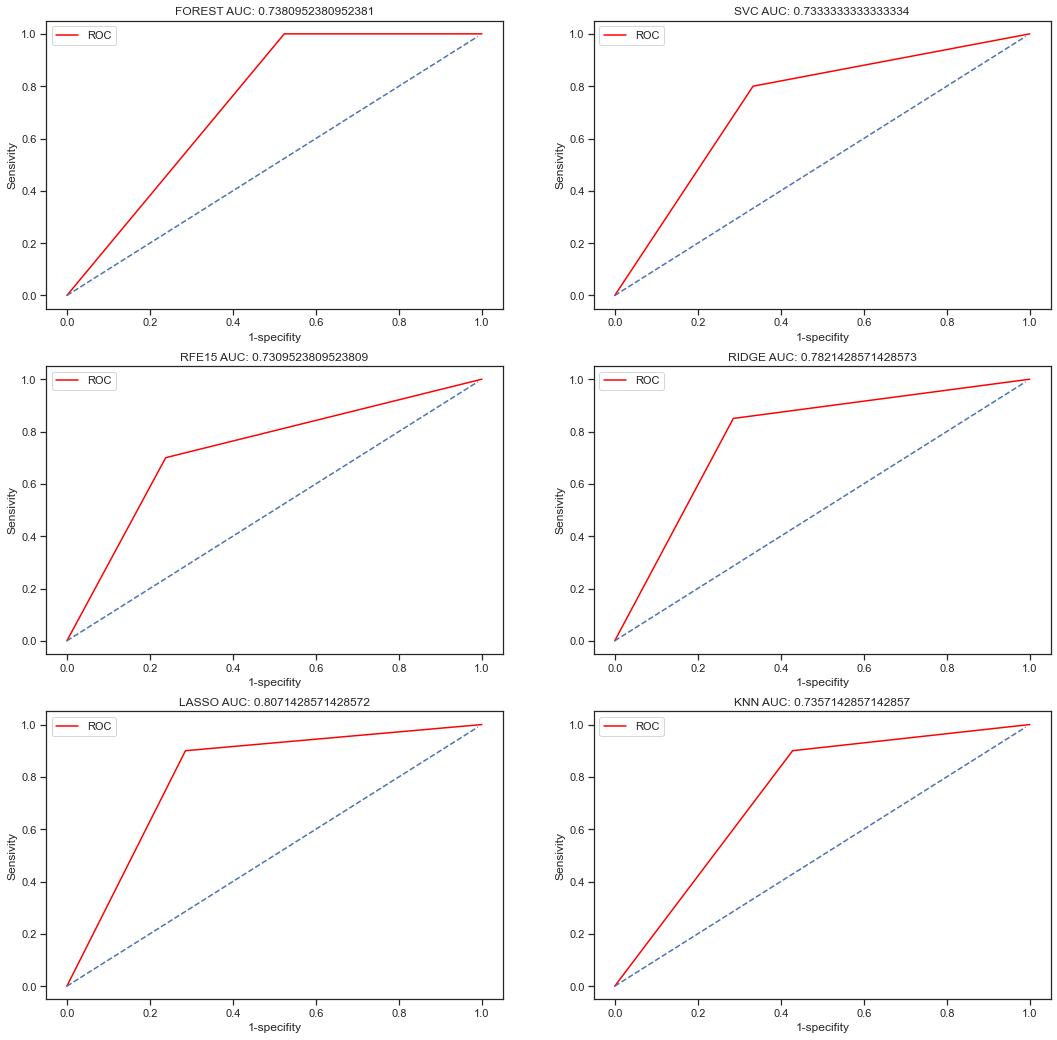

In [91]:
#Para elegir el mejor modelo comparando sus curvas ROC y AUC:

from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score

fig, [[ax1,ax2],[ax3,ax4],[ax5,ax6]]  = plt.subplots(3,2, figsize=(18,18))

x=[i*0.01 for i in range(100)]
y=[i*0.01 for i in range(100)]
########################################## FOREST ##############################################################################

fr_a, fr_b, _ = roc_curve(Y_test, forest2.predict(X_test))
auc_f = roc_auc_score(Y_test,forest2.predict(X_test))
ax1.plot(fr_a, fr_b, color = "red", label = "ROC")
ax1.plot(x,y, linestyle = "--")
ax1.plot()
ax1.set_xlabel("1-specifity")
ax1.set_ylabel("Sensivity")
ax1.legend()
ax1.set_title("FOREST AUC: {0}".format(auc_f))

######################################### SVC ##################################################################################

sv_a, sv_b , _ = roc_curve(Y_test, yfit2)
auc_sv = roc_auc_score(Y_test, yfit2)
ax2.plot(sv_a, sv_b, color = "red", label = "ROC")
ax2.plot(x,y, linestyle = "--")
ax2.plot()
ax2.set_xlabel("1-specifity")
ax2.set_ylabel("Sensivity")
ax2.legend()
ax2.set_title("SVC AUC: {0}".format(auc_sv))

######################################### RF15 #################################################################################

rf15_a, rf15_b , _ = roc_curve(Y_test, lr15.predict(X_test15))
auc_rf15 = roc_auc_score(Y_test15, lr15.predict(X_test15))
ax3.plot(rf15_a, rf15_b, color = "red", label = "ROC")
ax3.plot(x,y, linestyle = "--")
ax3.set_xlabel("1-specifity")
ax3.set_ylabel("Sensivity")
ax3.legend()
ax3.set_title("RFE15 AUC: {0}".format(auc_rf15))

###################################### RIDGE ###################################################################################

rdg_a, rdg_b , _ = roc_curve(Y_test, rdg.predict(X_test))
auc_rdg = roc_auc_score(Y_test, rdg.predict(X_test))
ax4.plot(rdg_a, rdg_b, color = "red", label = "ROC")
ax4.plot(x,y, linestyle = "--")
ax4.plot()
ax4.set_xlabel("1-specifity")
ax4.set_ylabel("Sensivity")
ax4.legend()
ax4.set_title("RIDGE AUC: {0}".format(auc_rdg))

###################################### LASSO ###################################################################################

lss_a, lss_b , _ = roc_curve(Y_test, lssf.predict(X_test))
auc_lss = roc_auc_score(Y_test, lssf.predict(X_test))
ax5.plot(lss_a, lss_b, color = "red", label = "ROC")
ax5.plot(x,y, linestyle = "--")
ax5.plot()
ax5.set_xlabel("1-specifity")
ax5.set_ylabel("Sensivity")
ax5.legend()
ax5.set_title("LASSO AUC: {0}".format(auc_lss))

###################################### KNN ###################################################################################

knn_a, knn_b , _ = roc_curve(Y_test, Knn.predict(X_test))
auc_knn = roc_auc_score(Y_test, Knn.predict(X_test))
ax6.plot(knn_a, knn_b, color = "red", label = "ROC")
ax6.plot(x,y, linestyle = "--")
ax6.plot()
ax6.set_xlabel("1-specifity")
ax6.set_ylabel("Sensivity")
ax6.legend()
ax6.set_title("KNN AUC: {0}".format(auc_knn))

plt.show()

In [92]:
auc_scores = pd.DataFrame({
    "modelo": ["Forest","SVC","RFE15","RIDGE","LASSO","KNN"],
    "AUC": [auc_f, auc_sv, auc_rf15, auc_rdg, auc_lss, auc_knn]    
})
auc_scores

,modelo,AUC
0,Forest,0.738095
1,SVC,0.733333
2,RFE15,0.730952
3,RIDGE,0.782143
4,LASSO,0.807143
5,KNN,0.735714


In [93]:
auc_scores[auc_scores["AUC"]== max(auc_scores["AUC"])]#Vemos que según AUC el mejor modelo para predecir es Lasso.

,modelo,AUC
4,LASSO,0.807143


By: Nahuel Cedrés Torres https://www.linkedin.com/in/nahuel-cedr%C3%A9s/